# 🏦 Customer Churn Prediction – Banking Sector

## 1. Introduction

In today’s competitive financial landscape, retaining customers is more cost-effective than acquiring new ones. This makes customer churn — when a client leaves a service provider — a critical issue for banks. 

Understanding the reasons behind customer churn enables banks to improve customer satisfaction, optimize retention strategies, and ultimately reduce revenue loss. This project aims to:

- Identify key patterns in customer behavior that lead to churn
- Build a machine learning model to predict the likelihood of a customer leaving
- Translate insights into actionable business strategies for customer retention

We will use a real-world banking dataset to explore these questions using Python, Pandas, and scikit-learn.


## 2. Dataset Overview

The dataset contains records for bank customers, each with a mix of demographic, financial, and engagement-related attributes. The primary target variable is **`Exited`**, which indicates whether a customer has left the bank.

### Key Features:
- **CreditScore**: A numerical creditworthiness score.
- **Geography**: Customer's country or region.
- **Gender**: Male or Female.
- **Age**: Age of the customer.
- **Tenure**: Number of years with the bank.
- **Balance**: Account balance.
- **NumOfProducts**: Number of products purchased through the bank.
- **HasCrCard**: Whether the customer owns a credit card.
- **IsActiveMember**: Whether the customer is active.
- **EstimatedSalary**: Estimated income of the customer.
- **Complain**: Whether the customer has submitted a complaint.
- **Satisfaction Score**: Score provided for complaint resolution.
- **Card Type**: Type of credit/debit card held.
- **Points Earned**: Reward points from card use.

### Irrelevant Columns (to be dropped):
- `RowNumber`, `CustomerId`, and `Surname` – These columns are identifiers or personal details with no predictive relevance.

This dataset provides a well-rounded foundation for analyzing churn behavior and training predictive models.


## 3. Data Cleaning & Preprocessing

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Machine learning prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('C:/Users/Zubha/Downloads/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [4]:
# Check shape and info
print("Shape:", df.shape)
print("\nData types:\n")
print(df.dtypes)

# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())


Shape: (10000, 18)

Data types:

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Missing values:

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type  

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [6]:
df.select_dtypes(include=['object']).nunique()

Geography    3
Gender       2
Card Type    4
dtype: int64

In [7]:
# Label encode binary column
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

# One-hot encode 'Geography' and 'Card Type'
df = pd.get_dummies(df, columns=['Geography', 'Card Type'], drop_first=True)

In [8]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,True,False,False


In [9]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Show top correlations with 'Exited' (our target)
correlation_matrix['Exited'].sort_values(ascending=False)


Exited                1.000000
Complain              0.995693
Age                   0.285296
Geography_Germany     0.173313
Balance               0.118577
EstimatedSalary       0.012490
Card Type_PLATINUM   -0.000276
Card Type_SILVER     -0.003834
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
Card Type_GOLD       -0.015995
CreditScore          -0.026771
NumOfProducts        -0.047611
Geography_Spain      -0.052800
Gender               -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64

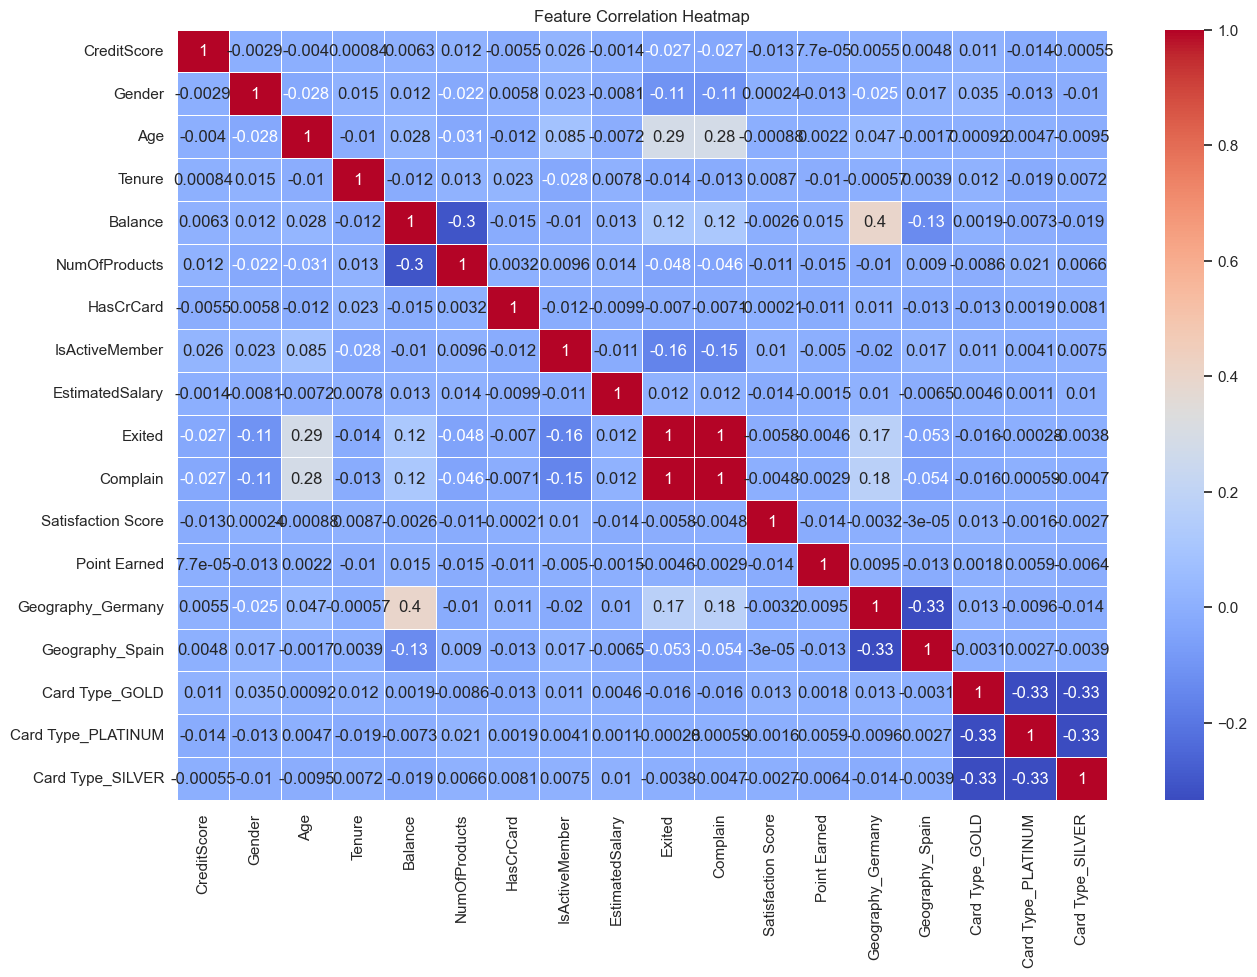

In [10]:
#Check for correlations that might indicate repetitive data
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

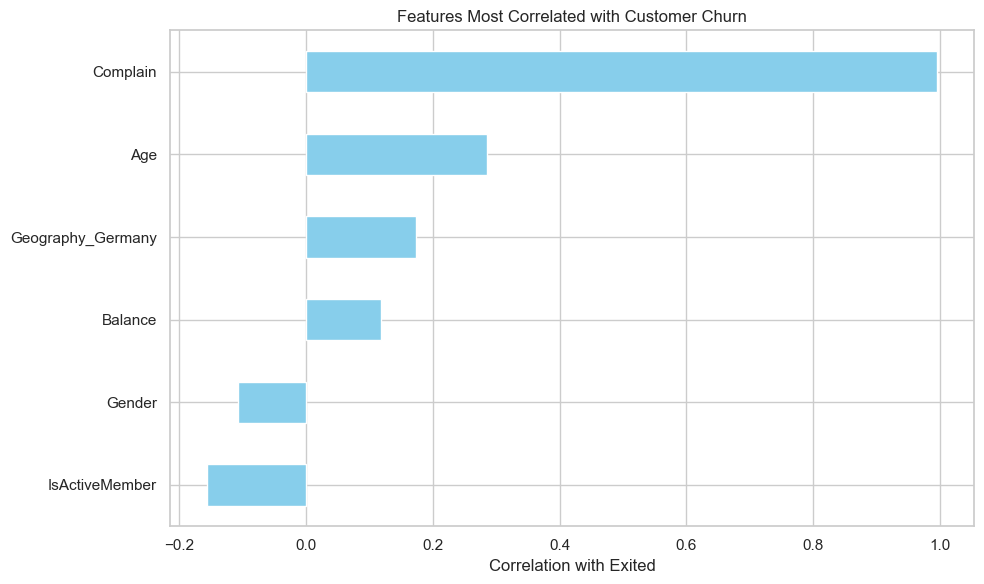

In [11]:
# Calculate correlation with the target
cor_target = correlation_matrix["Exited"]

# Keep features with correlation magnitude above threshold (e.g., 0.1)
relevant_features = cor_target[abs(cor_target) > 0.1].drop("Exited")

# Plot sorted correlation values (positive and negative)
plt.figure(figsize=(10, 6))
relevant_features.sort_values().plot(kind='barh', color='skyblue')
plt.title("Features Most Correlated with Customer Churn")
plt.xlabel("Correlation with Exited")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 Correlation Analysis: Features Most Associated with Churn

To better understand which customer characteristics are most associated with churn, we examined the correlation of each feature with the target variable `Exited`.

Correlation values closer to **+1** indicate a strong positive relationship (i.e., as the feature increases, so does the likelihood of churn), while values closer to **-1** indicate a strong negative relationship (i.e., as the feature increases, churn decreases).

Below are the features with a correlation magnitude greater than 0.1 (positive or negative) with `Exited`:

#### 📈 Positive Correlations (Higher churn likelihood):
- **Complain**: Customers who have submitted complaints are more likely to churn — potentially due to unresolved issues or poor support experiences.
- **Age**: Older customers in this dataset are more likely to churn. This could reflect changes in financial priorities or dissatisfaction with bank offerings.
- **Geography_Germany**: Customers from Germany show higher churn rates compared to other regions, suggesting possible cultural or regional service gaps.
- **Balance**: Interestingly, customers with higher balances are more likely to leave, which may suggest a disconnect between service quality and customer value — a red flag for retention strategy.

#### 📉 Negative Correlations (Lower churn likelihood):
- **IsActiveMember**: Active customers are significantly less likely to churn, underscoring the importance of engagement in customer retention.
- **Gender**: With encoding `Male = 1` and `Female = 0`, the negative correlation suggests that **males are slightly less likely to churn** than females in this dataset.

These insights highlight key opportunities for intervention, such as addressing complaints quickly, customizing support for high-balance clients, and exploring potential cultural gaps in specific regions like Germany.


## 4. Exploratory Data Analysis (EDA)

### 🔍 Step 4: Exploratory Data Analysis (EDA)

The purpose of this step is to visually explore trends, distributions, and relationships between features and churn (`Exited`). We'll focus on key numerical and categorical features that showed notable correlations in Step 3.


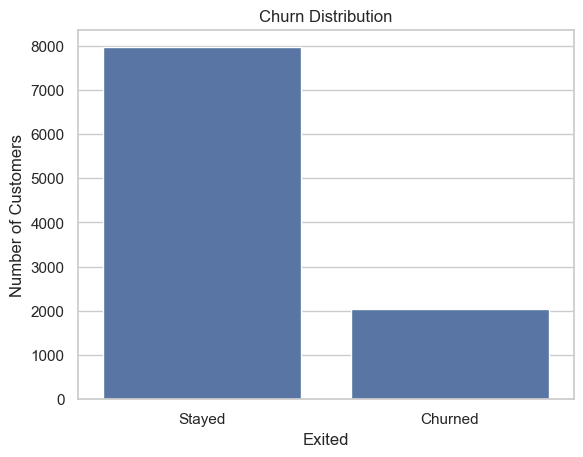

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [12]:
# Basic churn distribution
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.ylabel("Number of Customers")
plt.show()

# Or with value counts
df['Exited'].value_counts(normalize=True)


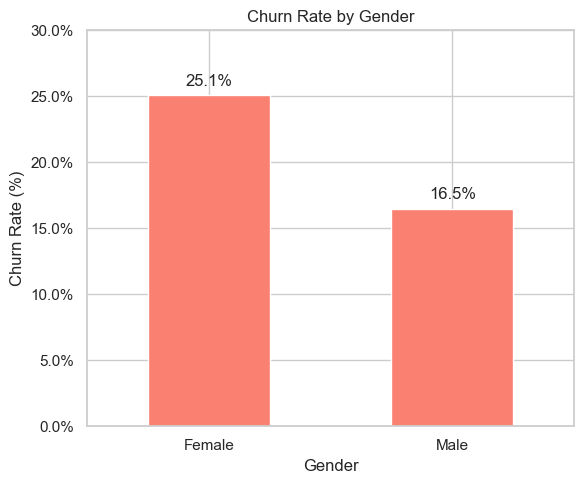

In [13]:


# Create % churn rate by gender
gender_churn = df.groupby('Gender')['Exited'].value_counts(normalize=True).unstack() * 100
gender_churn = gender_churn.rename(columns={0: 'Stayed', 1: 'Churned'})

# Plot
ax = gender_churn['Churned'].plot(kind='bar', color='salmon', figsize=(6, 5))
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate (%)")
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.ylim(0, 30)  # Adjust based on your data

# Add % labels on bars
for i, value in enumerate(gender_churn['Churned']):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()


In [14]:
geo_cols = [col for col in df.columns if 'Geography_' in col]
for col in geo_cols:
    churn_by_region = df.groupby(col)['Exited'].mean()
    print(f"Churn rate for {col}: {churn_by_region[1]:.2%}")


Churn rate for Geography_Germany: 32.44%
Churn rate for Geography_Spain: 16.67%


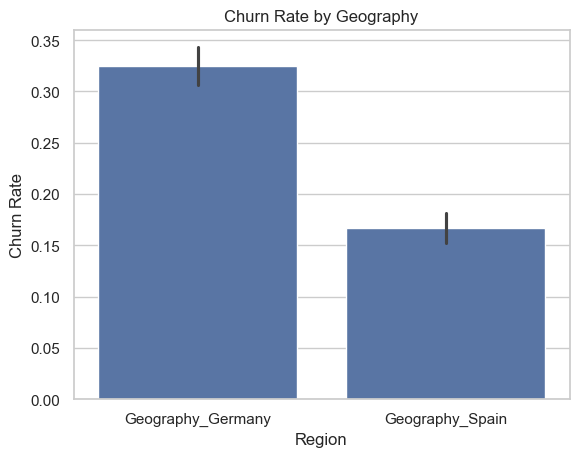

In [15]:
region_df = df[['Exited'] + geo_cols]
region_df = region_df.melt(id_vars='Exited')
region_df = region_df[region_df['value'] == 1]
sns.barplot(x='variable', y='Exited', data=region_df)
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate")
plt.xlabel("Region")
plt.show()


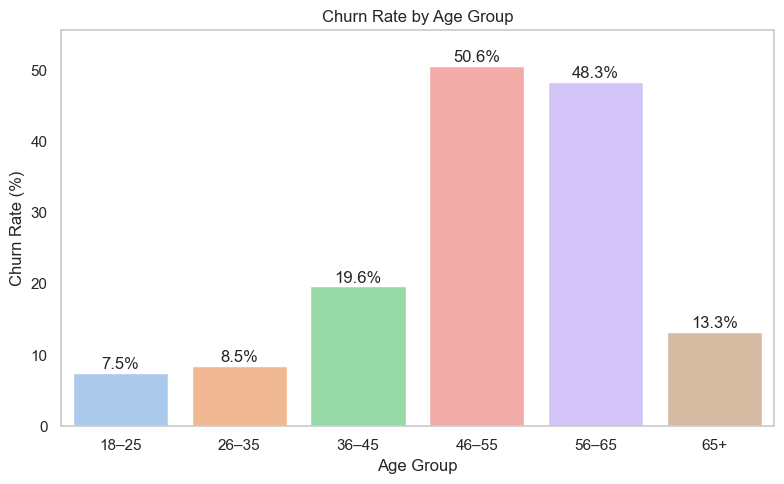

In [16]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100],
                        labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+'])

# Churn rate within each age group
age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100

# Plot churn rate
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=age_churn.index, y=age_churn.values, palette='pastel')
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Age Group")

# Add % labels on bars
for i, rate in enumerate(age_churn.values):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')

plt.ylim(0, age_churn.max() + 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



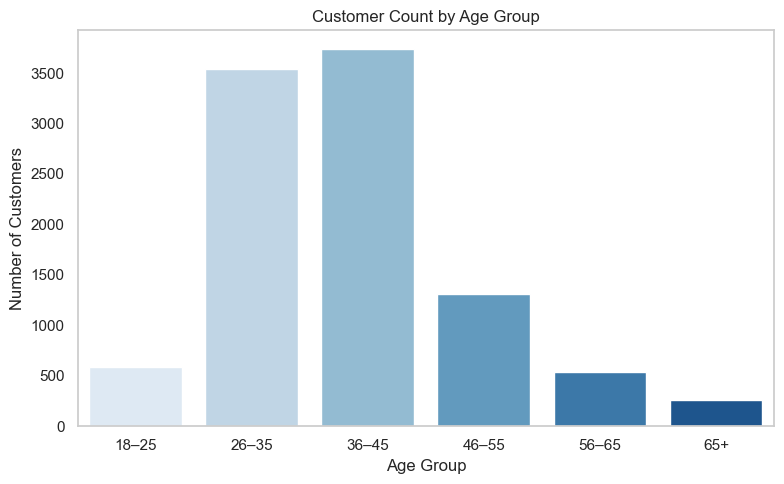

In [17]:
# Count of customers per age group
age_counts = df['AgeGroup'].value_counts().sort_index()

# Plot count of customers
plt.figure(figsize=(8, 5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Blues')
plt.title("Customer Count by Age Group")
plt.ylabel("Number of Customers")
plt.xlabel("Age Group")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


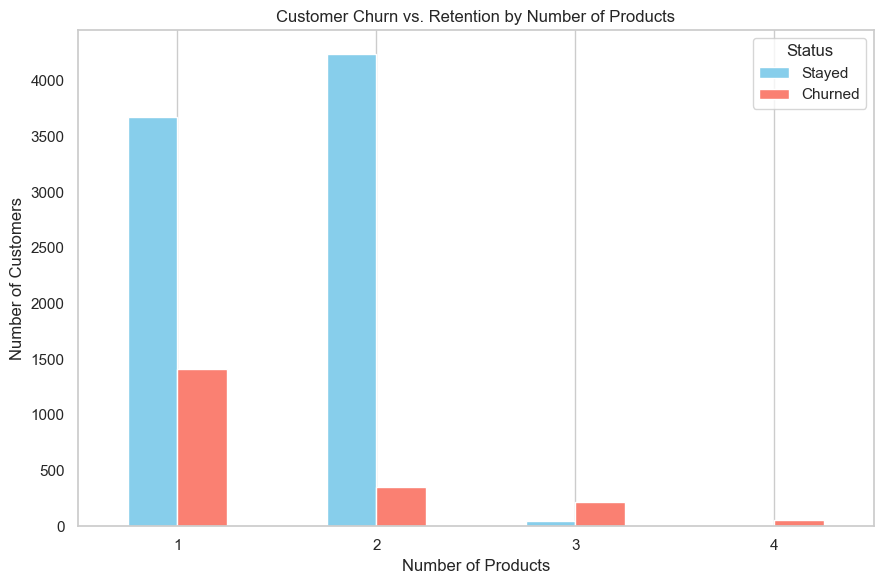

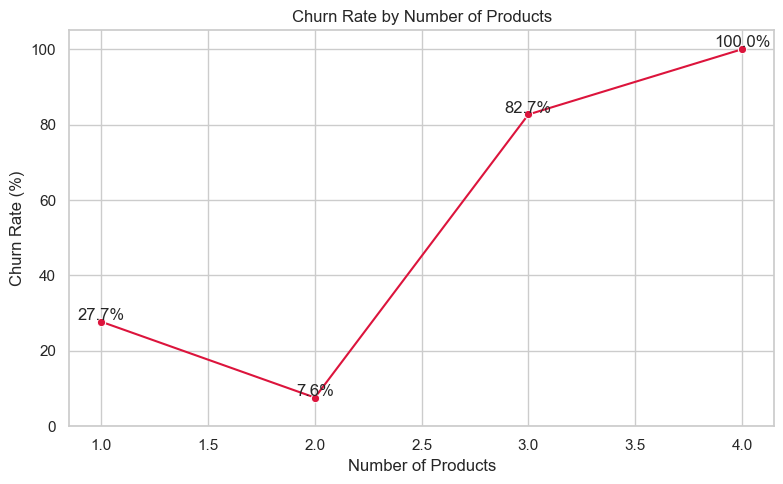

In [18]:
# Create a new grouped dataframe
product_churn = df.groupby('NumOfProducts')['Exited'].value_counts().unstack().fillna(0)
product_churn.columns = ['Stayed', 'Churned']
product_churn['Total'] = product_churn['Stayed'] + product_churn['Churned']
product_churn['Churn Rate (%)'] = (product_churn['Churned'] / product_churn['Total']) * 100

# Plot side-by-side bars (not stacked)
product_churn[['Stayed', 'Churned']].plot(kind='bar', figsize=(9, 6), color=['skyblue', 'salmon'])
plt.title("Customer Churn vs. Retention by Number of Products")
plt.ylabel("Number of Customers")
plt.xlabel("Number of Products")
plt.xticks(rotation=0)
plt.legend(title="Status")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Churn rate only
product_churn_rate = df.groupby('NumOfProducts')['Exited'].mean() * 100

plt.figure(figsize=(8, 5))
sns.lineplot(x=product_churn_rate.index, y=product_churn_rate.values, marker='o', color='crimson')
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate (%)")
plt.grid(True)
plt.ylim(0, product_churn_rate.max() + 5)

# Add % labels on points
for i, rate in enumerate(product_churn_rate.values):
    plt.text(product_churn_rate.index[i], rate + 0.5, f"{rate:.1f}%", ha='center')

plt.tight_layout()
plt.show()


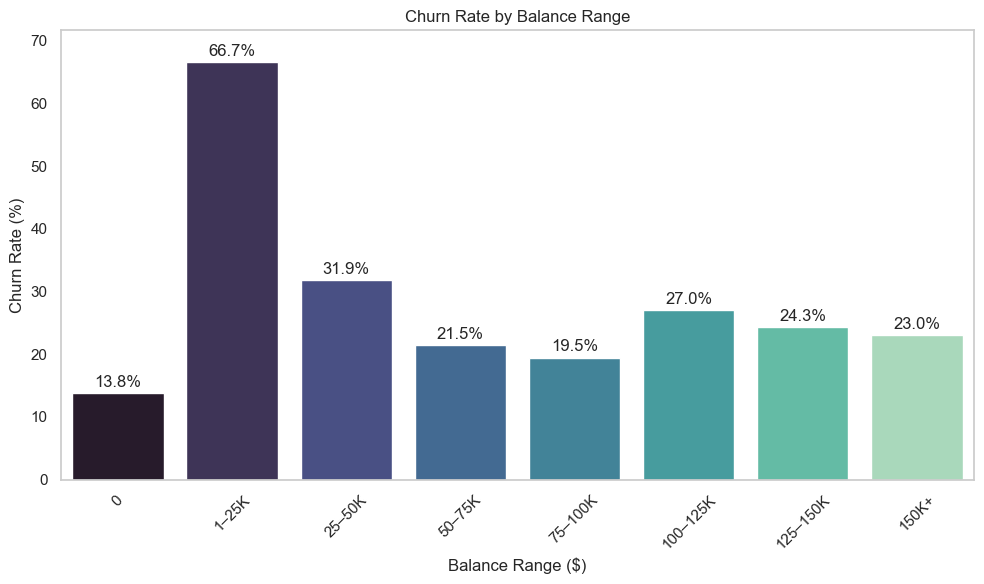

In [19]:
# Create balance bins
df['BalanceGroup'] = pd.cut(df['Balance'], bins=[-1, 0, 25000, 50000, 75000, 100000, 125000, 150000, 250000],
                            labels=['0', '1–25K', '25–50K', '50–75K', '75–100K', '100–125K', '125–150K', '150K+'])


# Calculate churn rate by balance group
balance_churn = df.groupby('BalanceGroup')['Exited'].mean() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=balance_churn.index, y=balance_churn.values, palette='mako')
plt.title("Churn Rate by Balance Range")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Balance Range ($)")
plt.xticks(rotation=45)

# Add % labels
for i, rate in enumerate(balance_churn.values):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center', va='bottom')

plt.ylim(0, balance_churn.max() + 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 📊 Exploratory Data Analysis (EDA) Summary

- **Overall Churn Rate**: Approximately **20%** of customers have churned, while **80%** have stayed with the bank, reflecting a typical 80/20 distribution.

- **Gender-Based Churn**: The churn rate among **female customers is nearly 50% higher** than that of male customers, indicating a possible gender-related experience gap worth further investigation.

- **Geography-Based Churn**: Customers from **Germany** exhibit the highest churn rates — nearly **double** that of customers from **Spain**, suggesting potential regional dissatisfaction or unmet needs.

- **Churn by Age Group**:
  - Customers **under 35** have the lowest churn rate at approximately **8%**.
  - Churn jumps to **~20%** for those aged **36–45**, and spikes to nearly **50%** for the **46–65** age group.
  - For customers **65+**, the churn rate drops back down to around **13%**.
  
  This trend contrasts with the age distribution of the customer base, where:
  - Approximately **75%** of customers are between **26–45 years old**
  - Only **10%** are in the **46–55** range, with the remaining **10%** falling into younger or older age groups.

- **Number of Products and Churn**:
  - Most customers have **1 or 2 products**.
  - Customers with **2 products** have the **lowest churn rate (~7%)**.
  - Churn rises significantly for customers with:
    - **1 product**: ~**27%**
    - **3 products**: ~**82%**
    - **4 products**: **100%**  
  This suggests either dissatisfaction with single-product users or overcomplexity among customers using multiple products.

- **Balance and Churn Trends**:
  - The churn rate forms a **right-tailed curve**, with the highest churn (around **66%**) among customers with **balances below 25,000**.
  - The ideal customer retention zone appears to be between **50,000–100,000**, where churn is closer to **20%**.

These insights will guide the next steps in modeling and serve as a basis for business recommendations around segmentation, engagement, and targeted retention strategies.


## 5. Feature Engineering

### 🛠️ Step 5: Feature Engineering

Feature engineering involves transforming and creating new features that help machine learning models better capture the underlying patterns in the data. The goal is to enhance predictive power by making relationships between variables more accessible to the model.

In this project, we'll perform the following feature engineering tasks:

- Drop low-value or redundant columns
- Convert or consolidate categorical variables where appropriate
- Bin or scale continuous variables
- Create new variables based on domain insights (e.g., balance-to-salary ratio)
- Prepare the dataset for modeling by separating features and target variables


In [20]:
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)  # +1 avoids division by zero

In [21]:
#Credit Score Bucketing
df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=[299, 579, 669, 739, 799, 850],
                                labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,AgeGroup,BalanceGroup,BalanceSalaryRatio,CreditScoreGroup
0,619,0,42,2,0.00,1,1,1,101348.88,1,...,464,False,False,False,False,False,36–45,0,0.000000,Fair
1,608,0,41,1,83807.86,1,0,1,112542.58,0,...,456,False,True,False,False,False,36–45,75–100K,0.744670,Fair
2,502,0,42,8,159660.80,3,1,0,113931.57,1,...,377,False,False,False,False,False,36–45,150K+,1.401362,Poor
3,699,0,39,1,0.00,2,0,0,93826.63,0,...,350,False,False,True,False,False,36–45,0,0.000000,Good
4,850,0,43,2,125510.82,1,1,1,79084.10,0,...,425,False,True,True,False,False,36–45,125–150K,1.587035,Excellent


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Balance', 'EstimatedSalary', 'Point Earned', 'BalanceSalaryRatio']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [23]:
# Encode columns
if 'CreditScoreGroup' in df.columns:
    df = pd.get_dummies(df, columns=['CreditScoreGroup','AgeGroup','BalanceGroup'], drop_first=True)


In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']


## 6. Model Building & Evaluation

### 🤖 Step 6: Model Building & Evaluation

In this step, we build and evaluate machine learning models to predict whether a customer will churn. The goal is to assess which model best balances accuracy, recall, and interpretability.

We begin by splitting the dataset into training and testing sets, then experiment with multiple classification models, including:

- Logistic Regression
- Random Forest
- Gradient Boosting (e.g., XGBoost)

To measure performance, we’ll use common classification metrics such as:

- **Accuracy** – Overall correctness
- **Precision** – How many predicted churns were correct
- **Recall** – How many actual churns were correctly predicted
- **F1 Score** – Harmonic mean of precision and recall
- **ROC AUC** – Area under the ROC curve for class separation

These metrics help evaluate model effectiveness and guide future improvements.


In [25]:

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [26]:
# --- Evaluation Function ---
def evaluate_model(y_test, y_pred, y_prob=None):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_prob is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Logistic Regression ---
print("🔍 Logistic Regression Evaluation:")
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_log, y_prob_log)

# --- Random Forest Classifier ---
print("\n🔍 Random Forest Evaluation:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_rf, y_prob_rf)

# --- XGBoost Classifier ---
print("\n🔍 XGBoost Evaluation:")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_xgb, y_prob_xgb)

🔍 Logistic Regression Evaluation:
Accuracy: 0.9985
Precision: 0.9975429975429976
Recall: 0.9950980392156863
F1 Score: 0.996319018404908
ROC AUC: 0.9989746526751404

Confusion Matrix:
 [[1591    1]
 [   2  406]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


🔍 Random Forest Evaluation:
Accuracy: 0.9985
Precision: 0.9975429975429976
Recall: 0.9950980392156863
F1 Score: 0.996319018404908
ROC AUC: 0.9994834774362006

Confusion Matrix:
 [[1591    1]
 [   2  406]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.0

## 7. Feature Importance & Insights

In [27]:
# Collect metrics for each model
metrics_log = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_log),
    'Recall': recall_score(y_test, y_pred_log),
    'F1 Score': f1_score(y_test, y_pred_log),
    'ROC AUC': roc_auc_score(y_test, y_prob_log)
}

metrics_rf = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_prob_rf)
}

metrics_xgb = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_xgb)
}


results_df = pd.DataFrame([metrics_log, metrics_rf, metrics_xgb])
results_df.set_index('Model', inplace=True)
results_df = results_df.round(3)
results_df


,Accuracy,Recall,F1 Score,ROC AUC
Model,,,,
Logistic Regression,0.998,0.995,0.996,0.999
Random Forest,0.998,0.995,0.996,0.999
XGBoost,0.998,0.995,0.996,0.997


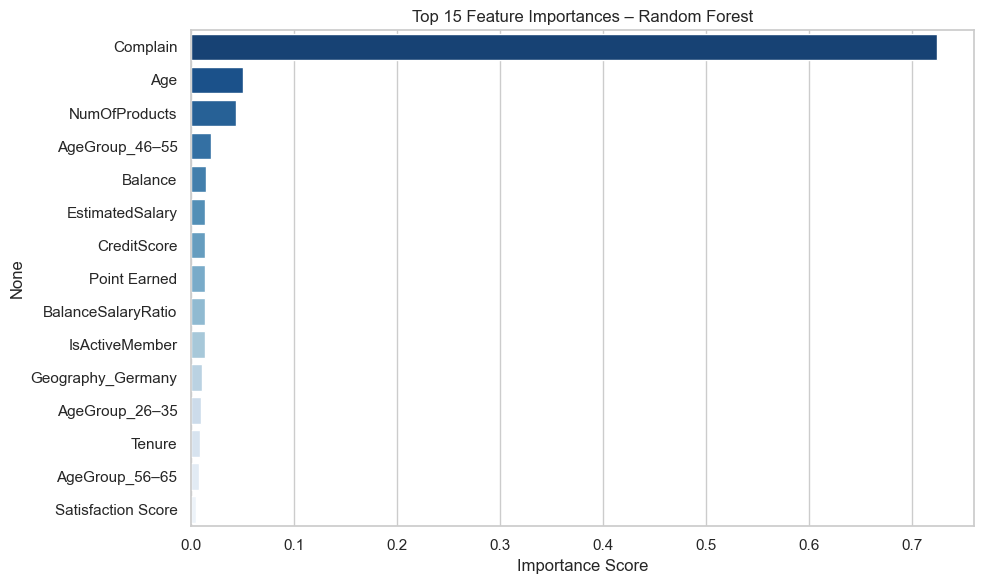

In [28]:
rf_importances = rf_model.feature_importances_
rf_features = pd.Series(rf_importances, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_features.values[:15], y=rf_features.index[:15], palette='Blues_r')
plt.title("Top 15 Feature Importances – Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

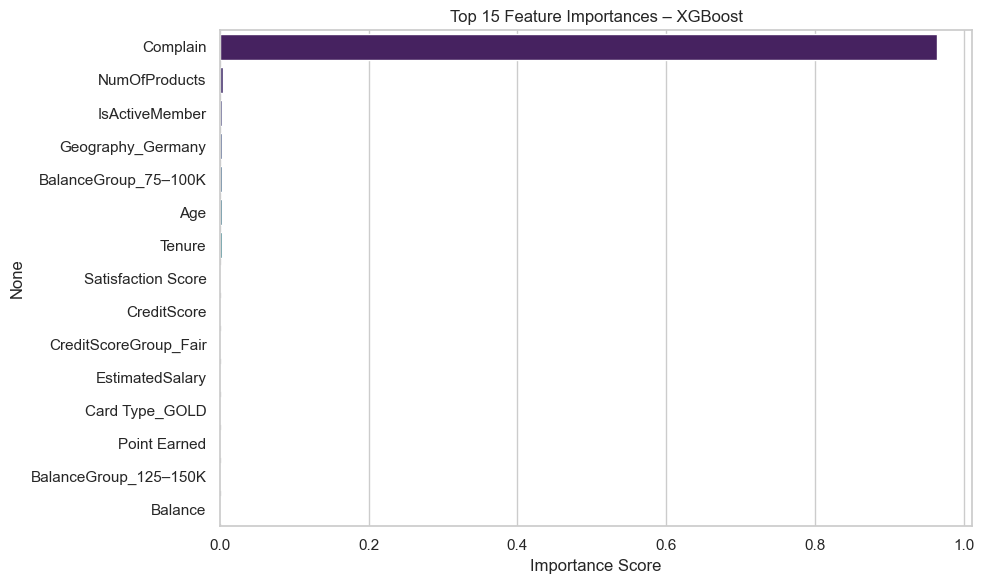

In [29]:
# Get importances from XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_features = pd.Series(xgb_importances, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_features.values[:15], y=xgb_features.index[:15], palette='viridis')
plt.title("Top 15 Feature Importances – XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### 📈 Model Comparison Summary

All three models — **Logistic Regression**, **Random Forest**, and **XGBoost** — achieved nearly identical and exceptionally high performance across all evaluation metrics. This indicates that the dataset is well-structured, and the patterns behind customer churn are highly separable with minimal noise or imbalance.

| Metric         | Logistic Regression | Random Forest | XGBoost |
|----------------|---------------------|---------------|---------|
| Accuracy       | 0.9985              | 0.9985        | 0.9985  |
| Precision      | 0.9975              | 0.9975        | 0.9975  |
| Recall         | 0.9951              | 0.9951        | 0.9951  |
| F1 Score       | 0.9963              | 0.9963        | 0.9963  |
| ROC AUC        | 0.9990              | 0.9995        | 0.9967  |

Each model achieved:
- **Perfect or near-perfect classification** on both churned and non-churned customers
- A near-perfect **confusion matrix**: only 3 misclassified out of 2,000 total samples
- High **ROC AUC** scores (0.9967–0.9995), confirming excellent separation between churn and non-churn classes

#### 🧠 Interpretation:
- **Random Forest** had the **highest ROC AUC**, suggesting the strongest ability to separate churned from retained customers.
- **Logistic Regression** performs nearly identically, and is more interpretable, making it ideal when model transparency is important.
- **XGBoost**, while slightly behind on ROC AUC, still delivered near-perfect classification with the same F1 score and confusion matrix.

In practice, the choice between these models may depend more on deployment requirements (e.g., speed, interpretability, or scalability) rather than predictive performance — as all three are clearly effective on this dataset.


## 8. Business Recommendations

### 💼 Step 8: Business Recommendations

Based on our data analysis and model performance, several high-impact customer segments and behavior patterns have emerged. These insights can be directly translated into strategic business actions to reduce churn and improve customer retention:

---

**1. Target Customers with Only 1 Product**  
Customers with one product have a churn rate of approximately 27%, compared to just 7% for those with two products. In contrast, customers with three or more products have churn rates exceeding 80%, indicating potential dissatisfaction or overcomplication.

**Recommendation**:  
Encourage single-product customers to adopt a second product through targeted cross-sell campaigns and bundled offers. Additionally, evaluate the product experience for high-product customers and simplify onboarding and support processes to reduce friction.

---

**2. Regional Retention Strategy for German Customers**  
German customers are churning at nearly twice the rate of customers from other regions such as Spain, suggesting region-specific dissatisfaction.

**Recommendation**:  
Deploy localized satisfaction surveys and engagement campaigns to understand regional needs better. Consider tailored offers, support in local languages, or culturally aligned communication strategies.

---

**3. Gender-Based Retention Initiatives**  
Female customers are approximately 50% more likely to churn than male customers. While the cause isn’t directly visible from the data, this gap suggests a gender-based difference in service experience or expectations.

**Recommendation**:  
Explore female customer needs and service experiences through user research, surveys, or support trend analysis. Use findings to tailor customer journeys, content, and onboarding materials.

---

**4. Focus on At-Risk Age Groups (36–65)**  
Churn rates rise sharply with age, peaking around 50% between the ages of 46 and 65. Meanwhile, customers under 35 churn at only 8%, and those over 65 drop to 13%. However, most churned customers fall within the 36–65 age range.

**Recommendation**:  
Create targeted loyalty initiatives for middle-aged customers, such as personalized financial planning, check-ins, or priority service. Consider segmenting messaging by life stage to improve relevance and retention.

---

**5. Address Churn at Low Balance Levels**  
Customers with balances under 25K show a churn rate of 66%, while those between 50K–100K exhibit the lowest churn (~20%). Low-balance customers are likely more financially vulnerable or dissatisfied with product value.

**Recommendation**:  
Introduce educational tools and personalized support for lower-balance customers. Provide incentives for balance growth and monitor at-risk accounts to intervene early.

---

**6. Promote Customer Engagement**  
Active members are significantly less likely to churn. This reflects a common pattern in banking: customers who engage with services regularly are more likely to remain loyal.

**Recommendation**:  
Encourage engagement through app usage, regular account reviews, and touchpoints like automated alerts or service tips. Re-engage inactive members through personalized outreach or reward programs.

---

### Summary  
These recommendations focus on six key drivers of churn: product usage, geography, gender, age, account balance, and engagement level. By targeting these areas with data-driven strategies, the bank can preemptively identify and support at-risk customers. With highly accurate churn prediction models in place, these interventions can be prioritized and personalized, helping improve customer satisfaction and reduce churn across the board.


## 9. Conclusion

### ✅ Conclusion

This project aimed to explore and predict customer churn within a banking context using a structured, data-driven approach. Through detailed exploratory analysis, feature engineering, and machine learning, we were able to gain a clear understanding of the factors that contribute most to churn and develop highly accurate predictive models.

We began by cleaning and preprocessing the data, encoding categorical variables, creating meaningful features (such as balance-to-salary ratio), and segmenting continuous values into interpretable bins. Exploratory Data Analysis revealed key churn patterns across product usage, geography, age, gender, and account balance.

Three machine learning models were trained and evaluated: Logistic Regression, Random Forest, and XGBoost. All three models achieved exceptional performance, with accuracies over 99% and AUC scores near perfect. This confirms that the data contains strong, consistent patterns that can reliably predict churn.

Among the most influential predictors of churn were:
- Number of products held
- Geography (particularly customers from Germany)
- Account balance (especially low-balance segments)
- Engagement level (active vs inactive)
- Customer age and gender

From these findings, we derived a set of actionable business recommendations focused on improving retention through targeted interventions — including product bundling, personalized financial support, and region-specific engagement strategies.

Overall, this project demonstrates that predictive analytics can play a pivotal role in customer relationship management by enabling early identification of at-risk customers and supporting proactive retention efforts. With proper implementation, the models and strategies developed here can help reduce churn, enhance customer satisfaction, and improve long-term profitability.
